<a href="https://colab.research.google.com/github/MiguelOva/text_mining/blob/main/Bert_with_Tensorlfow_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Text Mining Project

#### Spring 2022
#### Opinion Mining Evaluation Forum

#### Students m20200246 Pedro Costa & m2019XXXX Ana Bernardes

In [62]:
### Data import

In [63]:
# Loading file 
import pandas as pd
#df = pd.read_csv('training_set.txt', delimiter = '\t')
df_dev = pd.read_csv('https://raw.githubusercontent.com/MiguelOva/text_mining/main/dev_set.txt', delimiter = '\t')
df_train = pd.read_csv('https://raw.githubusercontent.com/MiguelOva/text_mining/main/dev_set.txt', delimiter = '\t')
df_test = pd.read_csv('https://raw.githubusercontent.com/MiguelOva/text_mining/main/dev_set.txt', delimiter = '\t')

In [64]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [65]:
len(df_dev)

1000

In [66]:
df_dev.head()

,sentence,emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,2
4,Did you think we don't know about your affair ...,1


In [67]:
df_dev = pd.DataFrame(data=df_dev, columns=['sentence', 'emotion'])

In [68]:
ddf_devf[100:400]

NameError: ignored

In [69]:
# Check for empty cells

"""""
Avaliar a necessidade de filtrar sentences vazias
"""""

df_dev.isnull().sum()

sentence    0
emotion     0
dtype: int64

In [70]:
# Check emotion frequency
df_dev.emotion.value_counts()

1    211
2    170
8    158
4    104
5     97
7     96
6     87
3     77
Name: emotion, dtype: int64

In [71]:
from tqdm import tqdm_notebook as tqdm
def label_counter(df, field):
    """
    ???????????
    """
    return df[field].value_counts()

In [72]:
label_counter(df_dev, "emotion")

1    211
2    170
8    158
4    104
5     97
7     96
6     87
3     77
Name: emotion, dtype: int64

In [73]:
# Word Count
def word_count(text):
    """
    Function that counts text words
    """
    df_words = " ".join(text).split()
    # Count all words 
    freq = pd.Series(df_words).value_counts()
    return freq

In [74]:
word_count(list(df_dev['sentence']))[:25]

.           734
,           380
I           238
you         234
to          223
?           211
the         187
a           160
!           120
[PERSON]    101
of          101
it           99
me           76
You          75
and          75
in           72
that         71
is           67
for          61
be           56
do           53
I'm          49
this         47
with         45
not          44
dtype: int64

In [75]:
#### Preprocessing

In [76]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from bs4 import BeautifulSoup

nltk.download('wordnet')
nltk.download('stopwords')

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
stem = SnowballStemmer("english")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
def clean(text_in, lemmatize, stemmer):
    """
    Preprocessing Function  will consist of   
    - make everything lowercased
    - removing all symbols that are not letters
    - remove stopwords
    - replace words with the corresponding lemma

    """
    updates = []
    for j in tqdm(range(len(text_in))):
        
        text = text_in[j]
        
        #make everything lowercased
        text = text.lower()      
          
        #removing all symbols that are not letters
        text = re.sub("[^a-zA-Z]", ' ', text)
            
        #remove stopwords
        text = ' '.join([word for word in text.split() if word not in stop])
        
        #replace words with the corresponding lemma
        text = BeautifulSoup(text).get_text()
        
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        if stemmer:
            text = " ".join(stem.stemmer(word) for word in text.split())
        
        updates.append(text)
        
    return updates

In [78]:
def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"sentence": list_updated}))

In [79]:
updates = clean(df_dev["sentence"], lemmatize = True, stemmer = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/1000 [00:00<?, ?it/s]

In [80]:
update_df(df_dev, updates)
df_dev

,sentence,emotion
0,happens gold safe,4
1,natural get cold foot,8
2,lucky,7
3,little anxious get whoop et as,2
4,think know affair government official,1
...,...,...
995,ask careful,4
996,like jazz pal,7
997,put,1
998,ever imagine person spot like,7


In [81]:
word_count(df_dev['sentence'])[:20]

person      113
know         43
get          38
got          36
like         35
want         35
look         31
come         27
right        25
go           24
well         24
think        22
time         22
good         21
see          21
tell         20
one          19
u            19
location     18
gonna        18
dtype: int64

# -------------------------------------------------------------------
## Bert with Tensorflow

In [82]:
#!pip install transformers

In [83]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [84]:
df_dev

,sentence,emotion
0,happens gold safe,4
1,natural get cold foot,8
2,lucky,7
3,little anxious get whoop et as,2
4,think know affair government official,1
...,...,...
995,ask careful,4
996,like jazz pal,7
997,put,1
998,ever imagine person spot like,7


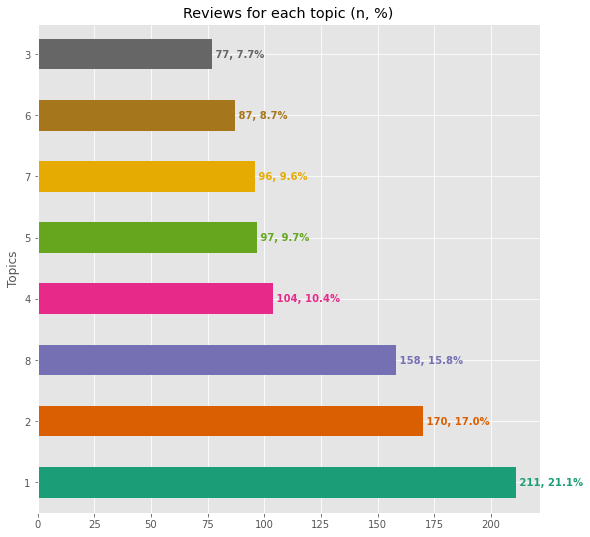

In [85]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(df_dev["emotion"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df_dev['emotion'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Topics",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(df_dev['emotion'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df_dev.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [86]:
# map topic descriptions to labels
df_dev['Labels'] = df_dev['emotion'].map({1: 0,
                                            2: 1,
                                            3: 2,
                                            4: 3,
                                            5: 4,
                                            6: 5,
                                            7: 6,
                                            8: 7})

# drop unused column
df_dev = df_dev.drop(["emotion"], axis=1)

df_dev.head()

,sentence,Labels
0,happens gold safe,3
1,natural get cold foot,7
2,lucky,6
3,little anxious get whoop et as,1
4,think know affair government official,0


In [87]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

y = tf.keras.utils.to_categorical(df_dev["Labels"].values, num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(df_dev['sentence'], y, test_size=0.25)

In [88]:
#for Colab users: 
#!pip install tensorflow_text
#!pip install -U tensorflow-text==2.5


#for Colab users: 
#!pip install tensorflow_hub

In [89]:
import tensorflow_hub as hub
import tensorflow_text as text

preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")


def get_embeddings(sentences):
  '''return BERT-like embeddings of input text
  Args:
    - sentences: list of strings
  Output:
    - BERT-like embeddings: tf.Tensor of shape=(len(sentences), 768)
  '''
  preprocessed_text = preprocessor(sentences)
  return encoder(preprocessed_text)['pooled_output']


get_embeddings([
    "happens gold safe"]
)

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[ 1.46681860e-01, -3.36151779e-01,  3.57096195e-01,
        -7.25558877e-01, -3.04658026e-01, -1.71349887e-02,
        -1.85808599e-01, -8.36467624e-01,  6.08394668e-02,
        -8.97232831e-01, -2.52782732e-01, -3.09667379e-01,
         3.86174908e-03,  1.08122770e-02, -5.35260081e-01,
        -4.45027530e-01, -2.12689072e-01, -9.03081968e-02,
         4.73602712e-01, -4.58505243e-01, -4.45035130e-01,
         1.36959389e-01,  4.71701398e-02,  2.39395425e-01,
        -4.06448424e-01,  9.20297131e-02, -4.73015487e-01,
        -4.16619390e-01, -9.08360705e-02, -7.80843914e-01,
         2.74880230e-01, -3.85270149e-01, -6.97202325e-01,
        -4.74027246e-01, -3.65972579e-01,  3.59871119e-01,
        -1.24268964e-01,  2.52412021e-01, -1.83335453e-01,
        -8.12139884e-02, -5.09255290e-01, -1.52975336e-01,
        -7.24549353e-01,  7.58052230e-01,  1.48247316e-01,
         5.29089272e-02, -1.53988317e-01, -4.67252076e-01,
      

In [90]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

In [91]:
n_epochs = 20

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy")
]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = METRICS)

model_fit = model.fit(x_train, 
                      y_train, 
                      epochs = n_epochs,
                      validation_data = (x_test, y_test),
                      callbacks = [earlystop_callback])

Epoch 1/20
24/24 [==============================] - 24s 497ms/step - loss: 2.1641 - accuracy: 0.1613 - val_loss: 2.0028 - val_accuracy: 0.2320
Epoch 2/20
24/24 [==============================] - 11s 478ms/step - loss: 2.0547 - accuracy: 0.1800 - val_loss: 1.9675 - val_accuracy: 0.2360
Epoch 3/20
24/24 [==============================] - 10s 435ms/step - loss: 1.9866 - accuracy: 0.2360 - val_loss: 1.9282 - val_accuracy: 0.2920
Epoch 4/20
24/24 [==============================] - 10s 429ms/step - loss: 1.9534 - accuracy: 0.2547 - val_loss: 1.9106 - val_accuracy: 0.2840
Epoch 5/20
24/24 [==============================] - 10s 430ms/step - loss: 1.8977 - accuracy: 0.2733 - val_loss: 1.9223 - val_accuracy: 0.2640
Epoch 6/20
24/24 [==============================] - 10s 428ms/step - loss: 1.8465 - accuracy: 0.3093 - val_loss: 1.8851 - val_accuracy: 0.2560
Epoch 7/20
24/24 [==============================] - 10s 433ms/step - loss: 1.7868 - accuracy: 0.3280 - val_loss: 1.8766 - val_accuracy: 0.2760

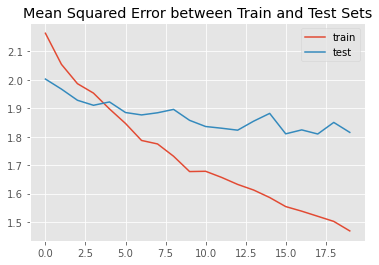

In [92]:
# plot history
import matplotlib.pyplot as pyplot 
pyplot.plot(model_fit.history['loss'], label='train')
pyplot.plot(model_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.title('Mean Squared Error between Train and Test Sets')
pyplot.show()

In [93]:
def predict_class(reviews):
  '''predict class of input text
  Args:
    - reviews (list of strings)
  Output:
    - class (list of int)
  '''
  return [np.argmax(pred) for pred in model.predict(reviews)]


In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred = predict_class(df_dev["sentence"])

Accuracy: 48.50%

F1 Score: 48.50


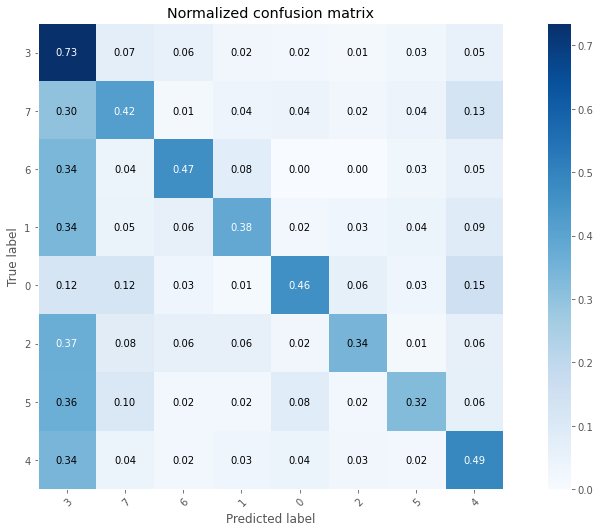

In [97]:
class_names = df_dev['Labels'].unique().tolist()

print("Accuracy: {:.2f}%".format(accuracy_score(df_dev['Labels'], y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df_dev['Labels'], y_pred, average='micro') * 100))

# Plot normalized confusion matrix
plot_confusion_matrix(df_dev['Labels'], y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [98]:
from sklearn.metrics import classification_report

print(classification_report(df_dev["Labels"], y_pred))

              precision    recall  f1-score   support

           0       0.39      0.73      0.51       211
           1       0.55      0.42      0.47       170
           2       0.52      0.47      0.49        77
           3       0.57      0.38      0.46       104
           4       0.61      0.46      0.53        97
           5       0.58      0.34      0.43        87
           6       0.54      0.32      0.41        96
           7       0.52      0.49      0.50       158

    accuracy                           0.48      1000
   macro avg       0.53      0.45      0.48      1000
weighted avg       0.52      0.48      0.48      1000

